# COGS 118A- Project Checkpoint

# Names

- Erlend Hordvei
- Adam Alvord
- Ethan Black
- Cedric Wong

# Abstract 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our project aims to create a supervised machine learning algorithm that can, with decent accuracy, predict what language a novel word comes from based on its phonemes. We have a dataset of words in 28 different languages and their translations into the International Phonetic Alphabet (IPA). We will train our algorithm with a subset of these words so it can learn the phonetic inventory of each of our languages. Then, we will feed it novel words and see how well we can predict their origin. In order to accomplish this, we will clean and organize our datasets into one matrix that keeps a count of the phonemes used in each individual word, and one-hot encodes its language of origin.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; For now, we intend to use a decision tree classifier for our model, implemented in sklearn. Decision trees are fairly easy to visualize and sklearn makes it easy to change parameters such as max depth. The tree will be split across phonemes so the presence of a particular phoneme in a given word decides which branch to take. Other branches will go through the word for particular groupings of phonemes to make a decision. We plan to use k-fold cross validation to assess the predictive power of the model across these parameters. We will assess the predictive power by splitting the words randomly into sets using folds and withholding one for testing purposes while the rest are used for training. Then, we can compare the prediction accuracy on the training set and the testing set and see the difference in the model’s performance.



# Background

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Identification of natural languages is a topic that has undergone many studies in the past. This task is often trivial for human translators, but coding a computer to do this has a much higher difficulty, and even human translators are known to make mistakes when it comes to obscure languages <a name="beesley"></a>[<sup>[1]</sup>](#beesleynote). There are a few different possible approaches. First is to match the words by letters, and their presence in each language. Alternatively, it can be done matching entire words that appear in multiple languages <a name="beesley"></a>[<sup>[1]</sup>](#beesleynote). Souter's article suggests using combinations of two or three letters, having the algorithm split each word <a name="souter"></a>[<sup>[2]</sup>](#souternote).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The data we will be using is already conveniently separated into phonemes, which lowers the amount of cleaning we will need to simple reshaping and merging of the data. There will likely be less regex text processing than is done in other research on this topic <a name="saji"></a>[<sup>[3]</sup>](#sajinote). We'll also split our training and test data in an 80-20 ratio like the experiment by Saji. It remains to be seen which model we will use, but there are several options depending on what kind of comparisons we would like to make.

# Problem Statement

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Identification of languages can be exceptionally difficult for humans who do not speak them. Humans excel in discerning speech-sounds from their native language’s phonetic inventory since they have been trained to do so since birth, but this comes at a cost. It’s often difficult for speakers of a given language to distinguish between, or to produce, phonemes that are outside of their phonetic inventory. This project aims to assist in language recognition using IPA and statistical, supervised machine learning. In order to do so, we must have our algorithm learn the phonetic inventories of our 28 different languages, and be able to calculate the probability of a novel word’s origin based on the phonemes it contains, their frequency in the word, and their frequency in a given language. One potential issue with this, however, is that not all of our language sets are the same size, meaning some languages will be over or under represented.

# Data

Our dataset: ipa-dic - https://github.com/open-dict-data/ipa-dict/releases

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The ipa-dict database contains dictionaries extracted from a number of different sources. It is possible there will be some incompatibilities between the formats of each dictionary we may need to resolve. We need to parse the IPA characters in the files and produce frequency counts for each word to represent them in our dataset, and assign the categorical language data based on the file we’re extracting each word from.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Some of the dictionary files are significantly different in size, because many languages are linguistically under-documented. We’d like to keep this difference in mind while splitting our training and testing data, and plan to do so by taking a random 20% of each language’s dictionary for testing.
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The original data is organized into 28 files containing one language dictionary, each with a number of words written in the International Phonetic Alphabet (IPA). In total, there are around 4 million words (3,890,537) across all 28 languages. IPA is a system of writing that allows linguists to textually represent words using phonemes. A phoneme is an individual speech-sound, for example, the “c” in the English word “cat” is represented as “k”. For more information about IPA, check out the official site: https://www.internationalphoneticalphabet.org/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our major variables will include; (1) what category, or language of origin, each word in our dictionaries belongs to; (2) what phonemes are present in a given word, and how frequently they appear; and (3) what pairs of phonemes are present, as well as their frequency.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We’ve cleaned our data and separated it into two matrices; X (our data) and Y (the language labels for our data). Our X matrix is of the shape N x D, where D (our dimensions/columns) are phonemes and pairs of phonemes across all of the languages present, and N (our words/rows) are the individual words of our combined dictionaries. Our Y matrix is of the shape N x L, where L is the number of languages we have, or 28. Y is one-hot encoded so we know the origin language of each of our words.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We have encoded each word/observation in X as a frequency count of each phoneme and pair of phonemes. For example, the English word “cat” in IPA is “kæt”, and would be encoded as a row of 0s, with 1s in the columns for “k”, “æ”, and “t”, since there is one of each present. Alternatively, the English word “women” in IPA is “wɪmɪn”, and would be encoded as a row of 0s with 1s in the columns for “w”, “m”, and “n”, and 2 in the column for “ɪ”, since it appears twice.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Since we’re discerning between our languages using phonemes, we want to know which are present in any given word. We’re representing this using frequency, and running a bi-gram analysis of our word list. This means that we will be first running through every word letter-by-letter to count how many times a given phoneme is used, then running through every word in pairs of letters to see what phoneme pairs are present. This will, overall, give us a good idea of what phonemes, and groups of phonemes, are present in any one language.



# Proposed Solution

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In order to produce a model which can discriminate between different languages, we’re going to need a classification model. We haven’t yet covered multiclass classification algorithms, so we’re not entirely sure what form this model will take as of yet, but we know that we definitely need a multiclass classifier to manage identifying 28 languages. Intuitively, a variant of the Decision Tree makes sense to us, some of these languages have phonemes that may be exclusive to their inventory and a decision tree seems like it would handle that pretty well. For testing, we’re going to reserve a set of novel words from each language to test our model’s accuracy, using a proportional 20% of each language dictionary to ensure our test set evaluates accuracy including as much of the low data language dictionaries as possible. 

# Evaluation Metrics

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; We will evaluate our model based on its testing accuracy. We will take a score of both how accurately we can generally classify novel words (i.e. how often we get the correct categorization), as well as accuracy across individual languages or groups of languages. This way we can see trends between how often we can predict the exact language of origin, as well as how well we can discern linguistic groups like latin-descended or germanic-descended languages.


# Preliminary results

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; So far, we’ve tried using 8 languages using a random forest decision tree, and a regular decision tree. We started with the 8 languages that were of a similar format; Swahili, Norwegian, Swedish, Finnish, German, English (US), Vietnamese (Central), and French (France). The dataset from these 8 languages includes 894,677 data points. Creating classifiers for big datasets takes a lot of computation and we have currently only been able to get results with decision tree classifiers and random forest classifiers. Creating a decision tree with our preliminary data, we were able to obtain an accuracy of about 97.3%. We’ve included some visualizations of our results below:

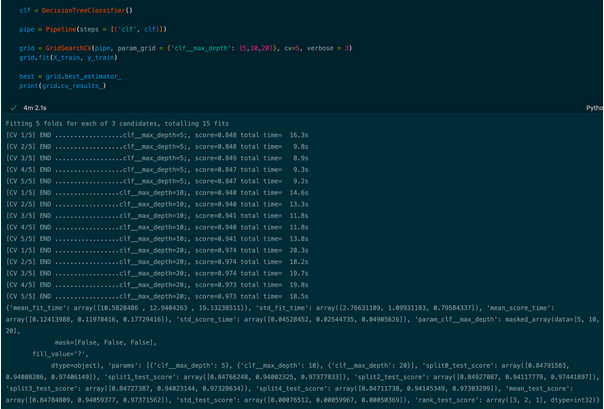

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Above is the code used to try different decision tree classifiers on the current dataset. The decision trees have different max depths, and by doing grid search with 5 fold cross validation the best model is obtained by using max_depth = 20. As you can see in the output of the code, the mean score for the models using max depth 20 was 97.3%. 


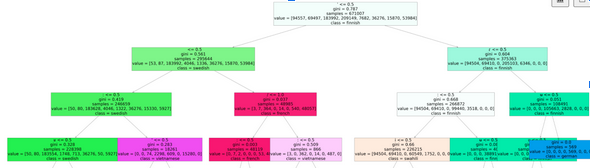

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This figure shows the first 4 levels of the tree classifier. The different colors tell us the majority class in each node. 


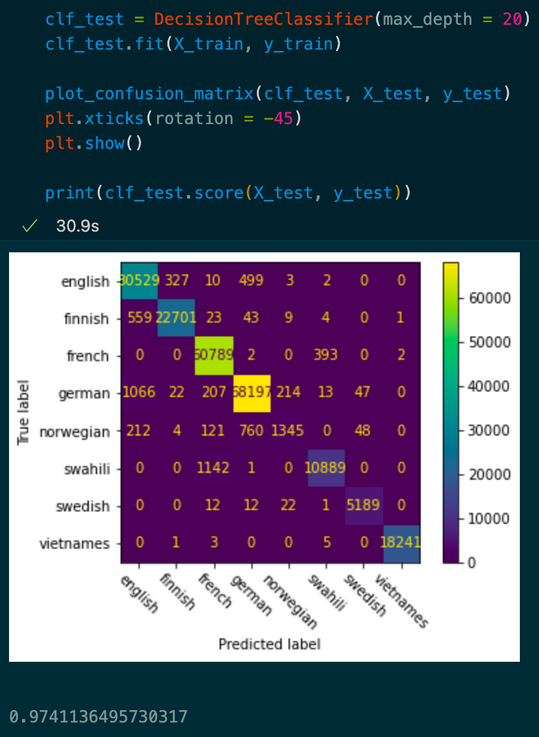

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; This is the plot of the confusion matrix of the fitted model with max depth 20. Testing the fitted model on the test set gives us 97.4% correctly classified words. The model is good at distinguishing Vietnamese and Swedish from the other languages. Vietnamese is the only asian language included so far so that is not surprising, but we are impressed by the models ability to distinguish Swedish from the other European languages. Especially Norwegian considering that people speaking Norwegian and Swedish can easily communicate with one another. The model has difficulties correctly classifying the Norwegian words, but this might be due to the fact that the amount of Norwegian words in the dataset is unbalanced compared to the other languages.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Other noticeable miss classifications are English words being classified as Finnish or German, and Finnish and German words being classified as English. The model also has some problems distinguishing words from Swahili and French.


# Ethics & Privacy

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; While the general function of this project may not in itself be objectionable, language dictionaries do not breach the privacy of any particular individual, the structural problems with how this sort of data is gathered were clear to us in searching for datasets to use. Centralized resources for phoneme information are fragmented, incomplete, and biased towards large languages on the whole, and that means, regardless of intent, tools developed for this functionality will disproportionately benefit those with the research apparatus in place to conduct linguistic research.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; In other words, underserved cultural and linguistic communities, without the wealth to conduct language research, are unlikely to benefit from these ML tools without outside funds and resources to support data gathering for this purpose. Even finding non-English IPA datasets was a bit of a challenge. Generally, an overemphasis on European interests seems to be foundationally baked into the available language datasets, and that overemphasis will likely carry over to our project.


# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* Communicate scheduling changes ASAP
  *  We will communicate mainly through our group discord
* Accept a realistic workload. Don’t take on too much!
  *  Taking on too much work at once will cause burnout, and can cause us to miss important milestones or deadlines. Don’t be afraid to ask for help!
* Honor each other’s time and work
  *  We’ll try our best to be punctual and work around each other’s schedules, as well as meet deadlines we set together as a group


# Project Timeline Proposal

We intend to meet at least once each week to divide up the work and to ensure everything is on track. 

Week 9:
* We need to complete the process of cleaning our data, and ensure that there are no special characters or other non-phoneme data messing with our models.
* Perform some cross-validation, and compare a few models against each other.
* Ideally, by the end of the week we will be able to make an informed choice on which model is optimal for our problem. Run that model on the full training set.

Week 10:
* With the output of our fully trained model, assess its accuracy and plot out some visualizations of accuracy, etc.
* Investigate if there are any properties of the model which we can use to say anything about the relationship between different languages, and visualize these patterns if they are there.
* Explain our full process in the final write-up.


# Footnotes
<a name="beesleynote"></a>1.[^](#beesley): Beesley, Kenneth. (1999). Language Identifier: A Computer Program for Automatic Natural-Language Identification of On-line Text. https://www.researchgate.net/publication/2391981_Language_Identifier_A_Computer_Program_for_Automatic_Natural-Language_Identification_of_On-line_Text
<br> 
<a name="souternote"></a>2.[^](#souter): Souter, C., Churcher, G., Hayes, J., Hughes, J., & Johnson, S. (1994). Natural Language Identification using Corpus- Based Models. Tisskrift.dk. Retrieved April 25, 2022, from https://tidsskrift.dk/her/article/download/25083/22006
<br>
<a name="sajinote"></a>3.[^](#saji): Saji, B. (2021, March 12). Language detection using natural language processing. Analytics Vidhya. Retrieved April 24, 2022, from https://www.analyticsvidhya.com/blog/2021/03/language-detection-using-natural-language-processing/ 
